In [44]:
# Loading the necessary libraries .   
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from imblearn.over_sampling import SMOTE
import sklearn.datasets as datasets
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns



In [45]:
# Loading wine dataset
wine = pd.read_csv('winequalityN.csv')

In [46]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
# Cheking the number of entries
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [48]:
# Checking for missing values
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [49]:
# There are 38 missing values in 6497 observations, which is just over 0.5 % so rows with missing values can be removed with
# no major effect on data
wine.dropna(inplace=True)

In [50]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
type                    6463 non-null object
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [51]:
# Checking the number of entries by type of wine
count = wine['type'].value_counts()
count

white    4870
red      1593
Name: type, dtype: int64

In [52]:
# Checking the number of entries by qyality of wine

print(wine['quality'].value_counts())

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


In [53]:
# For the purpose of analysis the wine quality ranking will be regrupped in to 2 classes: very good wine ( class 7 and above)
# and average wine (class 6 and below)
quality_classes = [ 
(wine['quality'] >= 7), (wine['quality'] < 7)]

In [54]:
# 1 =  very good wine (quality >= 7); 1 = average wine (quality <= 6) 

new_classes = [1, 0]
wine['QualityGroup'] = np.select(quality_classes, new_classes, default = 2)

In [55]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityGroup
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [56]:
# Cheking QualityGroup for class imbalance
newcount = wine['QualityGroup'].value_counts()
print(newcount)

0    5192
1    1271
Name: QualityGroup, dtype: int64


[Text(0, 0, 'Average wine (0)'), Text(0, 0, 'Very good wine(1)')]

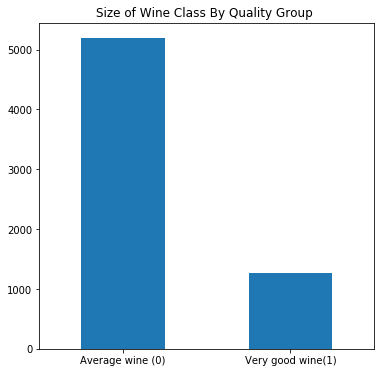

In [57]:
plot = newcount.plot(kind = 'bar',figsize=(6,6), title = 'Size of Wine Class By Quality Group ', y='Number of entries', x ='0 - average wine ; 1 - very good wine')
plot.set_xticklabels(['Average wine (0)','Very good wine(1)'], rotation=0 )

In [58]:
# Descriptive statistics for average wine

wine[wine['QualityGroup'] == 0].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityGroup
count,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.0
mean,7.249441,0.351950,0.314886,5.591025,0.058860,30.386653,117.133571,0.995105,3.216142,0.528588,10.262063,5.490370,0.0
std,1.284235,0.172163,0.152374,4.900115,0.037191,18.305942,58.518937,0.002855,0.160948,0.145483,1.067704,0.605872,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.0
25%,6.400000,0.230000,0.240000,1.800000,0.040000,16.000000,73.750000,0.993000,3.110000,0.430000,9.400000,5.000000,0.0
50%,7.000000,0.300000,0.300000,3.000000,0.049000,28.000000,119.000000,0.995400,3.200000,0.510000,10.000000,6.000000,0.0
75%,7.700000,0.430000,0.400000,8.300000,0.070000,42.000000,160.000000,0.997200,3.320000,0.590000,11.000000,6.000000,0.0
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000,0.0


In [59]:
# Descriptive statistics for very good wine

wine[wine['QualityGroup'] == 1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityGroup
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.0
mean,7.088316,0.289095,0.334571,4.843194,0.044601,31.048780,109.815893,0.993033,3.227278,0.541613,11.435484,7.158930,1.0
std,1.345137,0.116590,0.110181,4.067057,0.021050,15.317274,47.094882,0.003011,0.159176,0.161816,1.215198,0.376365,0.0
min,3.900000,0.080000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000,1.0
25%,6.300000,0.200000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990730,3.120000,0.420000,10.700000,7.000000,1.0
50%,6.900000,0.270000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000,1.0
75%,7.400000,0.340000,0.380000,6.525000,0.051000,40.000000,140.000000,0.995035,3.340000,0.640000,12.400000,7.000000,1.0
max,15.600000,0.915000,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000,1.0


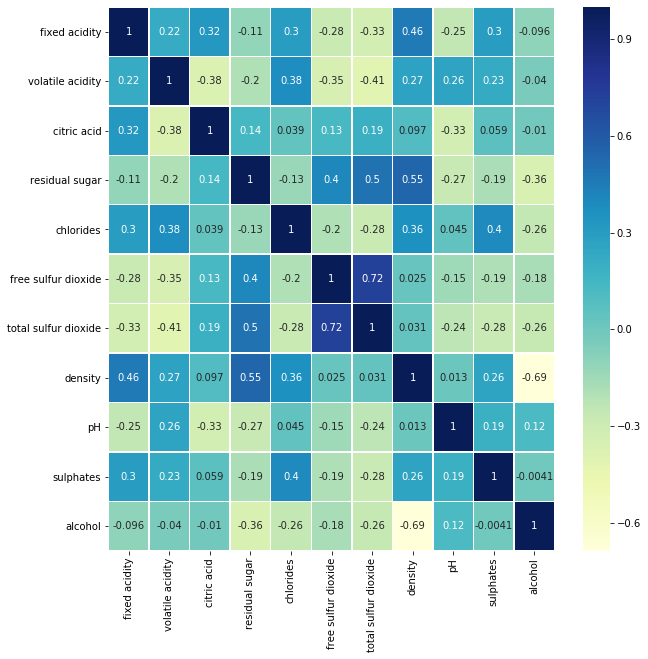

In [60]:
# Exploring correlation coefficients between the attributes
ux = wine[['fixed acidity', 'volatile acidity','citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH' , 'sulphates', 'alcohol']].corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(ux,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10}, cmap="YlGnBu")

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()


In [61]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
QualityGroup              int32
dtype: object

In [62]:
# converting 'QualityGroup' to float type 
wine = wine.astype({'QualityGroup': 'float64'})

In [63]:
# 'quality' culumn is not required anymore
wine.drop('quality', axis=1, inplace=True)

In [64]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityGroup
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0.0


In [65]:
# Attributes
X = wine.loc[:, wine.columns != 'QualityGroup']

In [66]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [67]:
# Target
Y = wine.loc[:, wine.columns == 'QualityGroup']

In [68]:
Y.head()

,QualityGroup
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [69]:
# converting white/red wine type to numeric values 
enc = LabelEncoder()
X.loc [:, ['type']]= \
X.loc [:, ['type']].apply(enc.fit_transform)
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [70]:
count1 = X['type'].value_counts()

In [71]:
count1

1    4870
0    1593
Name: type, dtype: int64

In [72]:
# Splitting data to train set(70%) and test set (30%)
X_train,X_test,Y_train,Y_test = \
train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [73]:
X_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1626,1,9.0,0.22,0.49,10.40,0.048,52.0,195.0,0.99870,3.31,0.44,10.200000
4369,1,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333
2541,1,9.0,0.26,0.34,6.70,0.029,21.0,162.0,0.99497,3.08,0.50,10.600000
2861,1,6.4,0.21,0.28,5.90,0.047,29.0,101.0,0.99278,3.15,0.40,11.000000
2952,1,6.1,0.27,0.25,1.80,0.041,9.0,109.0,0.99290,3.08,0.54,9.000000


In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4524 entries, 1626 to 1313
Data columns (total 12 columns):
type                    4524 non-null int32
fixed acidity           4524 non-null float64
volatile acidity        4524 non-null float64
citric acid             4524 non-null float64
residual sugar          4524 non-null float64
chlorides               4524 non-null float64
free sulfur dioxide     4524 non-null float64
total sulfur dioxide    4524 non-null float64
density                 4524 non-null float64
pH                      4524 non-null float64
sulphates               4524 non-null float64
alcohol                 4524 non-null float64
dtypes: float64(11), int32(1)
memory usage: 441.8 KB


In [75]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 3524 to 3067
Data columns (total 12 columns):
type                    1939 non-null int32
fixed acidity           1939 non-null float64
volatile acidity        1939 non-null float64
citric acid             1939 non-null float64
residual sugar          1939 non-null float64
chlorides               1939 non-null float64
free sulfur dioxide     1939 non-null float64
total sulfur dioxide    1939 non-null float64
density                 1939 non-null float64
pH                      1939 non-null float64
sulphates               1939 non-null float64
alcohol                 1939 non-null float64
dtypes: float64(11), int32(1)
memory usage: 189.4 KB


In [76]:
#  Concating together train attributes and train target  
wine_train = pd.concat([X_train, Y_train], axis = 1)

In [77]:
wine_train.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityGroup
1204,1,5.0,0.330,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.7,0.0
3467,1,6.6,0.240,0.27,10.3,0.047,54.0,219.0,0.99742,3.04,0.45,8.8,0.0
1368,1,7.3,0.220,0.41,15.4,0.050,55.0,191.0,1.00000,3.32,0.59,8.9,0.0
4649,1,5.7,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0
1313,1,9.2,0.320,0.42,1.3,0.046,14.0,186.0,0.99490,3.08,0.48,9.6,0.0


In [78]:
wine_train.reset_index(drop =True, inplace =True)

In [79]:
wine_train.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityGroup
4519,1,5.0,0.330,0.16,1.5,0.049,10.0,97.0,0.99170,3.48,0.44,10.7,0.0
4520,1,6.6,0.240,0.27,10.3,0.047,54.0,219.0,0.99742,3.04,0.45,8.8,0.0
4521,1,7.3,0.220,0.41,15.4,0.050,55.0,191.0,1.00000,3.32,0.59,8.9,0.0
4522,1,5.7,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0
4523,1,9.2,0.320,0.42,1.3,0.046,14.0,186.0,0.99490,3.08,0.48,9.6,0.0


In [213]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 13 columns):
type                    4524 non-null int64
fixed acidity           4524 non-null float64
volatile acidity        4524 non-null float64
citric acid             4524 non-null float64
residual sugar          4524 non-null float64
chlorides               4524 non-null float64
free sulfur dioxide     4524 non-null float64
total sulfur dioxide    4524 non-null float64
density                 4524 non-null float64
pH                      4524 non-null float64
sulphates               4524 non-null float64
alcohol                 4524 non-null float64
QualityGroup            4524 non-null float64
dtypes: float64(12), int64(1)
memory usage: 459.5 KB


In [215]:
# Saving wine train set for further analysis in Matlab
wine_train.to_csv('/Users/dlbor/Desktop/University/Data Sets/wine_train.csv', index=False)

In [80]:
#  Concating together test attributes and test target 
wine_test = pd.concat([X_test, Y_test], axis = 1)

In [81]:
wine_test.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityGroup
3524,1,5.3,0.36,0.27,6.3,0.028,40.0,132.0,0.99186,3.37,0.40,11.6,0.0
863,1,6.2,0.28,0.33,1.7,0.029,24.0,111.0,0.99000,3.24,0.50,12.1,0.0
2596,1,7.8,0.28,0.31,2.1,0.046,28.0,208.0,0.99434,3.23,0.64,9.8,0.0
4374,1,6.4,0.35,0.21,2.1,0.051,46.0,171.0,0.99320,3.16,0.50,9.5,0.0
1747,1,8.3,0.30,0.36,10.0,0.042,33.0,169.0,0.99820,3.23,0.51,9.3,0.0


In [82]:
wine_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 3524 to 3067
Data columns (total 13 columns):
type                    1939 non-null int32
fixed acidity           1939 non-null float64
volatile acidity        1939 non-null float64
citric acid             1939 non-null float64
residual sugar          1939 non-null float64
chlorides               1939 non-null float64
free sulfur dioxide     1939 non-null float64
total sulfur dioxide    1939 non-null float64
density                 1939 non-null float64
pH                      1939 non-null float64
sulphates               1939 non-null float64
alcohol                 1939 non-null float64
QualityGroup            1939 non-null float64
dtypes: float64(12), int32(1)
memory usage: 204.5 KB


In [219]:
# Saving wine test set for further analysis in Matlab
wine_test.to_csv('/Users/dlbor/Desktop/University/Data Sets/wine_test.csv', index=False)

In [83]:
# Applying BorderlineSMOTE to train set to balance the quality groups
oversample = BorderlineSMOTE()
X_train_smote, Y_train_smote = oversample.fit_resample(X_train, Y_train)

In [84]:
# Train data before SMOTE
Y_train.QualityGroup.value_counts()

0.0    3626
1.0     898
Name: QualityGroup, dtype: int64

In [85]:
# Train data after SMOTE
Y_train_smote.QualityGroup.value_counts()

1.0    3626
0.0    3626
Name: QualityGroup, dtype: int64

In [86]:
X_train_smote.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,9.0,0.22,0.49,10.40,0.048,52.0,195.0,0.99870,3.31,0.44,10.200000
1,1,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333
2,1,9.0,0.26,0.34,6.70,0.029,21.0,162.0,0.99497,3.08,0.50,10.600000
3,1,6.4,0.21,0.28,5.90,0.047,29.0,101.0,0.99278,3.15,0.40,11.000000
4,1,6.1,0.27,0.25,1.80,0.041,9.0,109.0,0.99290,3.08,0.54,9.000000


In [87]:
Y_train_smote.head()

,QualityGroup
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [88]:
#  Concating together train attributes and train target after SMOTE 
wine_train_smote = pd.concat([X_train_smote, Y_train_smote], axis = 1)

In [236]:
wine_train_smote.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityGroup
0,1,9.0,0.22,0.49,10.40,0.048,52.0,195.0,0.99870,3.31,0.44,10.200000,0.0
1,1,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,0.0
2,1,9.0,0.26,0.34,6.70,0.029,21.0,162.0,0.99497,3.08,0.50,10.600000,0.0
3,1,6.4,0.21,0.28,5.90,0.047,29.0,101.0,0.99278,3.15,0.40,11.000000,0.0
4,1,6.1,0.27,0.25,1.80,0.041,9.0,109.0,0.99290,3.08,0.54,9.000000,0.0


In [237]:
wine_train_smote.reset_index(drop =True, inplace =True)

In [239]:
wine_train_smote.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityGroup
0,1,9.0,0.22,0.49,10.40,0.048,52.0,195.0,0.99870,3.31,0.44,10.200000,0.0
1,1,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,0.0
2,1,9.0,0.26,0.34,6.70,0.029,21.0,162.0,0.99497,3.08,0.50,10.600000,0.0
3,1,6.4,0.21,0.28,5.90,0.047,29.0,101.0,0.99278,3.15,0.40,11.000000,0.0
4,1,6.1,0.27,0.25,1.80,0.041,9.0,109.0,0.99290,3.08,0.54,9.000000,0.0


In [240]:
wine_train_smote.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
QualityGroup            0
dtype: int64

In [241]:
wine_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
type                    7252 non-null int64
fixed acidity           7252 non-null float64
volatile acidity        7252 non-null float64
citric acid             7252 non-null float64
residual sugar          7252 non-null float64
chlorides               7252 non-null float64
free sulfur dioxide     7252 non-null float64
total sulfur dioxide    7252 non-null float64
density                 7252 non-null float64
pH                      7252 non-null float64
sulphates               7252 non-null float64
alcohol                 7252 non-null float64
QualityGroup            7252 non-null float64
dtypes: float64(12), int64(1)
memory usage: 736.6 KB


In [242]:
wine_train_smote.QualityGroup.value_counts()

1.0    3626
0.0    3626
Name: QualityGroup, dtype: int64

In [243]:
# Saving wine train set with SMOTE for further analysis in Matlab
wine_train_smote.to_csv('/Users/dlbor/Desktop/University/Data Sets/wine_train_smote.csv', index=False)